## Import libraries

In [1]:
import nltk # Natural Language Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data from CSV

In [4]:
data = pd.read_csv('/content/movie.csv')

data

text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]

In [5]:
X = data["text"]
y = data["label"]

## Remove Non Alphabetic Characters

In [6]:
X.shape, y.shape

((40000,), (40000,))

In [7]:
X[5][:255]

'A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defi'

## We will remove non alphabetic characters, best way to do that is regex method

In [8]:
import re
for i in range(X.shape[0]):
    X[i] = re.sub('[^A-Za-z]', ' ', X[i])

Streaming output truncated to the last 5000 lines.
<ipython-input-8-ef27540564e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = re.sub('[^A-Za-z]', ' ', X[i])
<ipython-input-8-ef27540564e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = re.sub('[^A-Za-z]', ' ', X[i])
<ipython-input-8-ef27540564e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = re.sub('[^A-Za-z]', ' ', X[i])
<ipython-input-8-ef27540564e6>:3: 

## Stemming

In [9]:
X[5][:255]

'A terrible movie as everyone has said  What made me laugh was the cameo appearance by Scott McNealy  giving an award to one of the murdered programmers in front of a wall of SUN logos  McNealy is the CEO of SUN Microsystem  a company that practically defi'

## As you can see above in stemming operation we extract root of the word. We will get rid of prefixes and suffixes. Before stemming operation we need to seperate sentences to words.

In [10]:
for i in range(X.shape[0]):
    X[i] = X[i].split(" ")
    X[i] = [w for w in X[i] if w != ""]

Streaming output truncated to the last 5000 lines.
<ipython-input-10-f3d146798daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].split(" ")
<ipython-input-10-f3d146798daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [w for w in X[i] if w != ""]
<ipython-input-10-f3d146798daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].split(" ")
<ipython-input-10-f3d146798daa>:3: SettingWithCopyWarning: 
A v

In [11]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [13]:
for i in range(X.shape[0]):
    X[i] = [stemmer.stem(w) for w in X[i]]

Streaming output truncated to the last 5000 lines.
<ipython-input-13-98ad68e498cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [stemmer.stem(w) for w in X[i]]
<ipython-input-13-98ad68e498cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [stemmer.stem(w) for w in X[i]]
<ipython-input-13-98ad68e498cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [stemmer.stem(w) for w in X[i]]
<ipython-input-13-98ad68e498

In [14]:
" ".join(X[5][:255])

'a terribl movi as everyon ha said what made me laugh wa the cameo appear by scott mcneali give an award to one of the murder programm in front of a wall of sun logo mcneali is the ceo of sun microsystem a compani that practic defin itself by it hatr of microsoft they have been instrument in file antitrust complaint against microsoft so were they silli enough to think thi bad movi would add fuel to that fire br br there s no public record i see of sun s involv but clearli the maker of thi movi know scott mcneali an interest mysteri'

## Remove Stop Words

In [15]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_ = stopwords.words("english")
",".join(stopwords_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

## By removing stop words we remove the low-level information from our text in order to give more focus to the important information. This words does not effect sentiment of the review.

In [16]:
for i in range(X.shape[0]):
    X[i] = [w for w in X[i] if w not in stopwords_]

Streaming output truncated to the last 5000 lines.
<ipython-input-16-0c07c07a96d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [w for w in X[i] if w not in stopwords_]
<ipython-input-16-0c07c07a96d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [w for w in X[i] if w not in stopwords_]
<ipython-input-16-0c07c07a96d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [w for w in X[i] if w not in stopwords_]
<

In [17]:
" ".join(X[5][:255])

'terribl movi everyon ha said made laugh wa cameo appear scott mcneali give award one murder programm front wall sun logo mcneali ceo sun microsystem compani practic defin hatr microsoft instrument file antitrust complaint microsoft silli enough think thi bad movi would add fuel fire br br public record see sun involv clearli maker thi movi know scott mcneali interest mysteri'

## Create Bag of Words for every review

### Sort words by frequency

In [18]:
word_dict = {}
for i in range(X.shape[0]):
    for w in X[i]:
        if w not in word_dict:
            word_dict[w] = 0
        word_dict[w] += 1
word_dict = sorted(word_dict.items(), key= lambda x : x[1], reverse=True)

# print most used 20 words

cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 21:
        break
    print(k,v)

br 161468
thi 120983
movi 82821
film 76721
wa 76526
hi 45875
one 44393
like 36327
ha 26752
time 25659
good 24284
make 24122
charact 22747
see 22623
get 22486
watch 22303
veri 22131
even 20357
stori 20221
would 19687


### Print Word Cloud

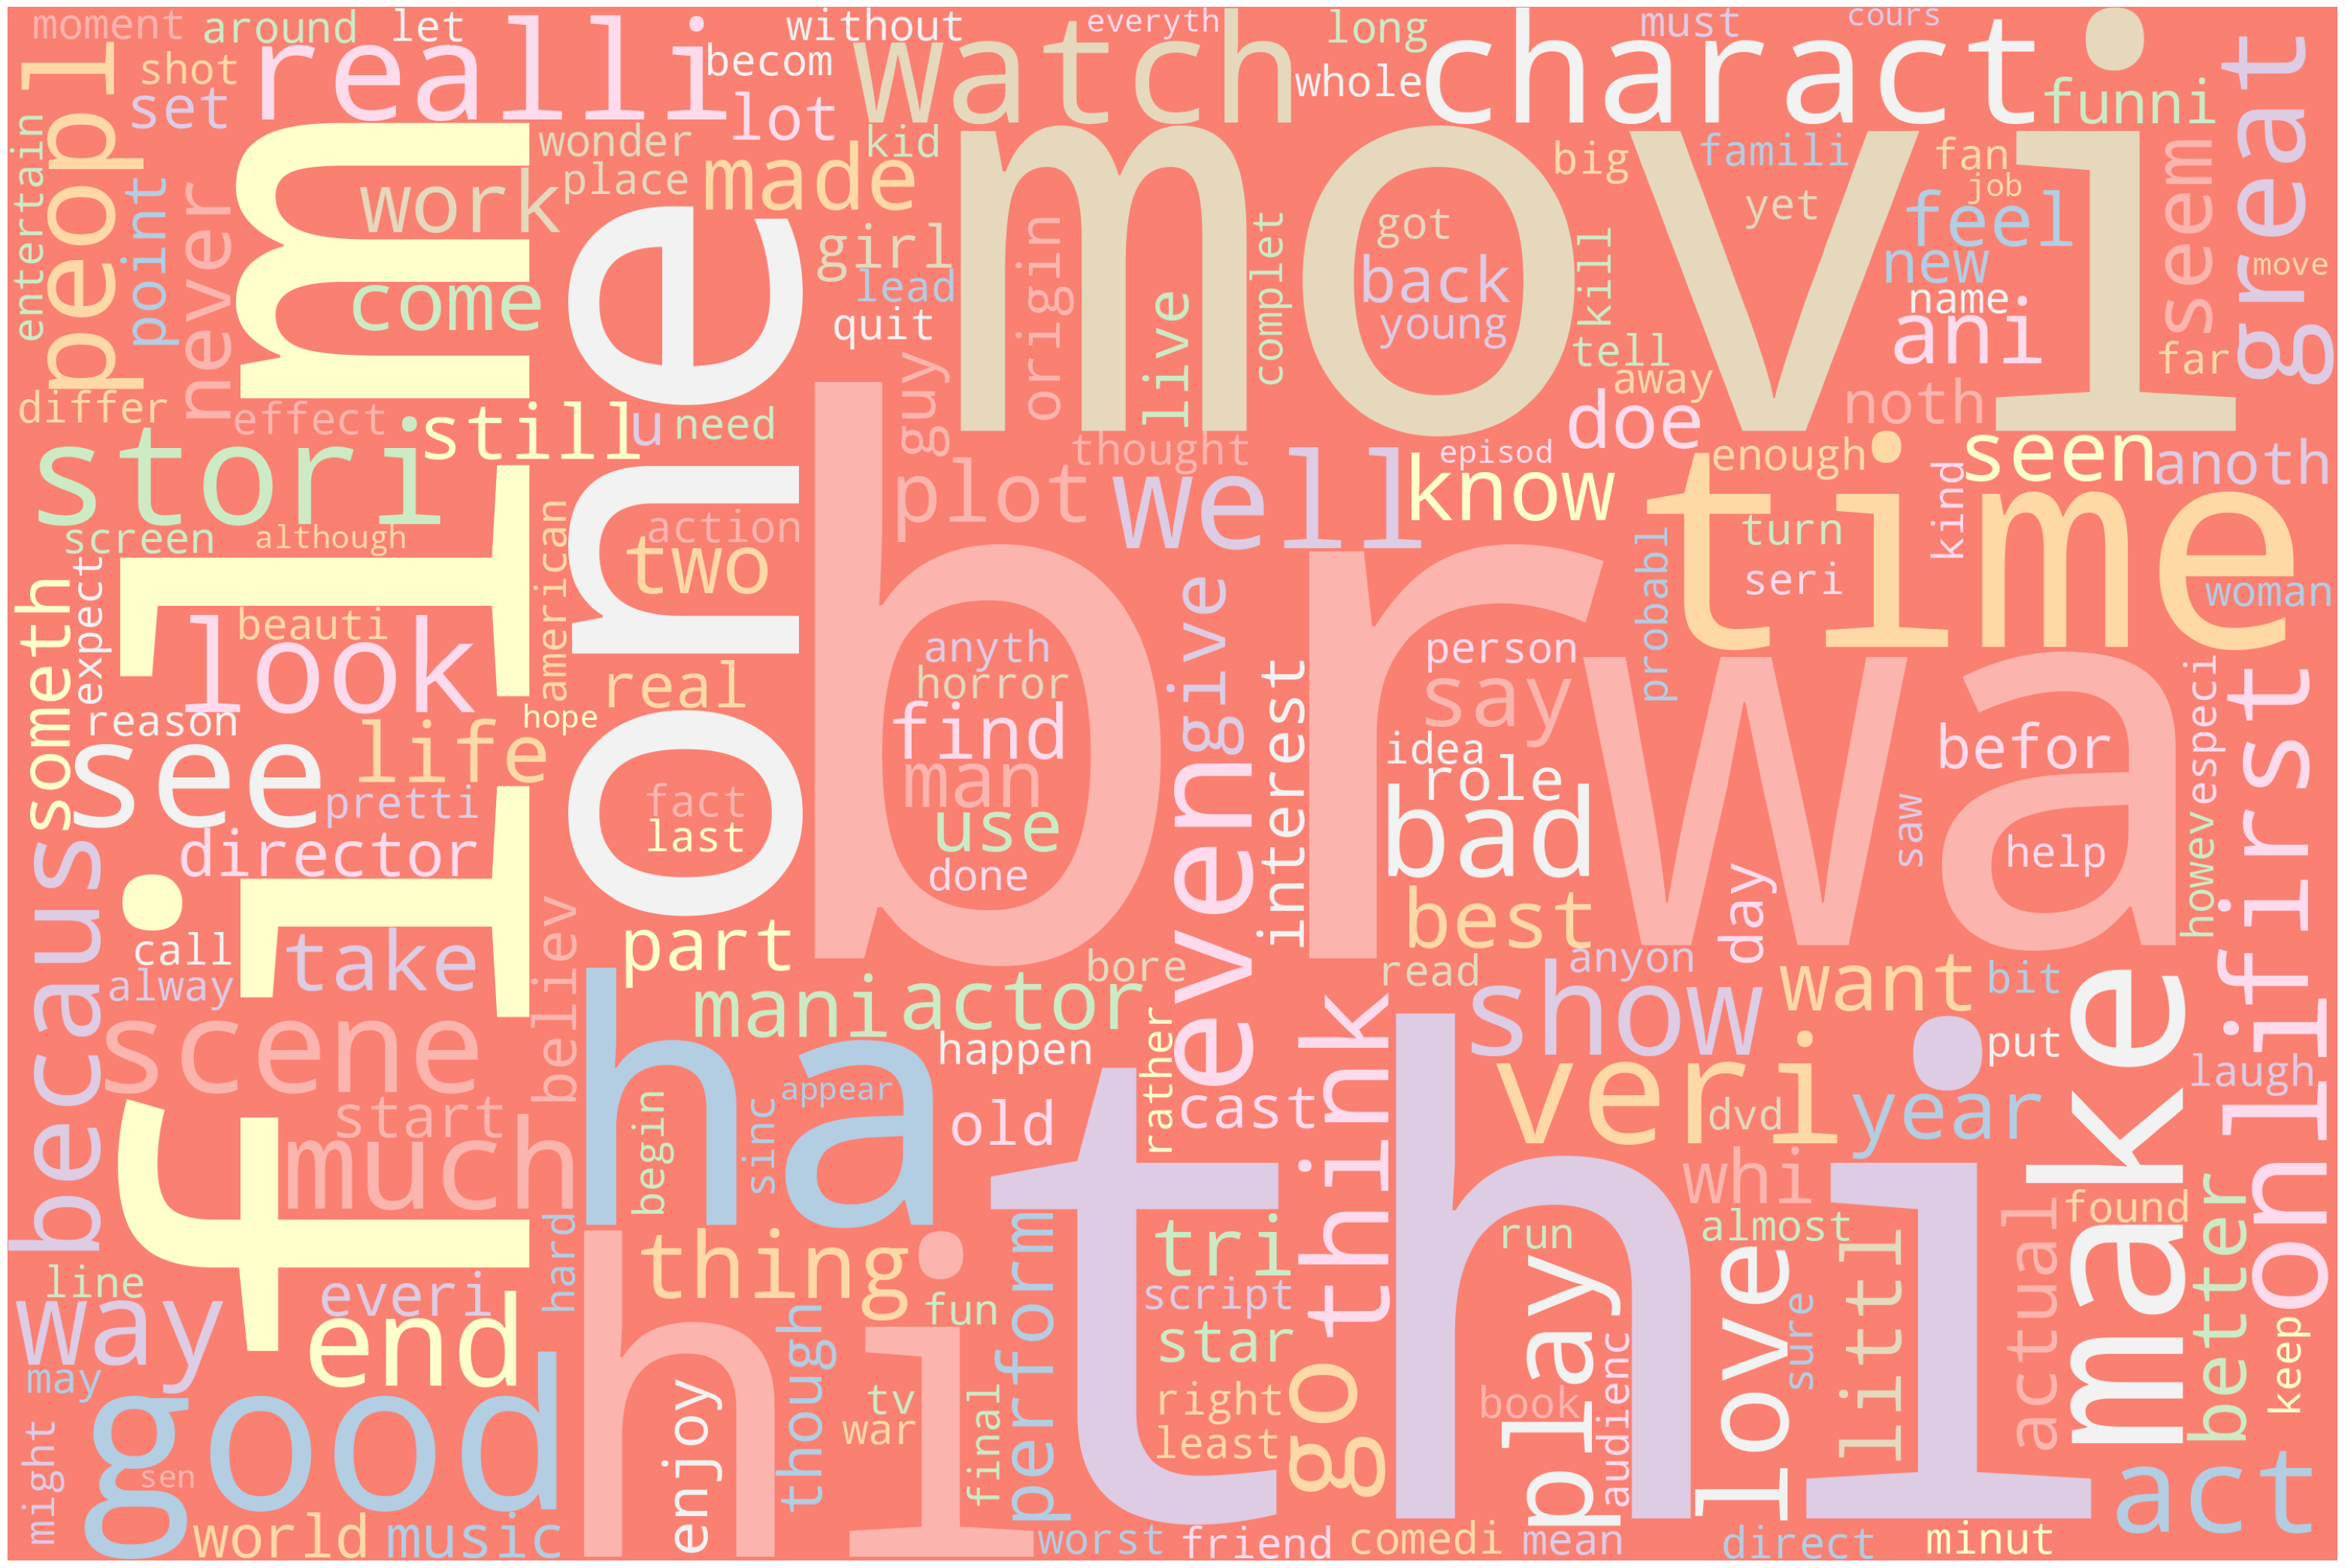

In [19]:
text = ""
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 5000:
        break
    for i in range(v):
        text += k + " "

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

### We will get 5000 most used words and store another dictionary

In [20]:
most_used_words = {}
cnt = 0
index = 0
for word, freq in word_dict:
    most_used_words[word] = index
    index += 1
    cnt += 1
    if cnt == 5000:
        break
list(most_used_words.items())[0:10]

[('br', 0),
 ('thi', 1),
 ('movi', 2),
 ('film', 3),
 ('wa', 4),
 ('hi', 5),
 ('one', 6),
 ('like', 7),
 ('ha', 8),
 ('time', 9)]

### We will remove words not in most used word dict and we change every word with its index

In [21]:
X_train = []
for i in range(X.shape[0]):
    list_ = []
    for w in X[i]:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    X_train.append(list_)
for i in X_train[0]:
    print(i, end=" ")

1937 427 15 29 2258 309 15 38 88 309 234 4539 309 55 966 6 55 1616 1045 826 354 592 485 366 13 2 198 19 14 2056 29 449 296 20 236 97 4 442 1420 42 514 103 440 484 355 2015 1643 6 614 925 67 38 4944 129 1989 5 262 341 248 5 76 2298 5 235 4 151 3216 239 3 1553 1678 1439 866 131 713 1460 4 527 2396 3899 

## Train with RNN

In [22]:
leng = 0
for i in range(len(X_train)):
    leng += len(X_train[i])
leng / len(X_train)

119.0482

In [25]:
X_train

[[1937,
  427,
  15,
  29,
  2258,
  309,
  15,
  38,
  88,
  309,
  234,
  4539,
  309,
  55,
  966,
  6,
  55,
  1616,
  1045,
  826,
  354,
  592,
  485,
  366,
  13,
  2,
  198,
  19,
  14,
  2056,
  29,
  449,
  296,
  20,
  236,
  97,
  4,
  442,
  1420,
  42,
  514,
  103,
  440,
  484,
  355,
  2015,
  1643,
  6,
  614,
  925,
  67,
  38,
  4944,
  129,
  1989,
  5,
  262,
  341,
  248,
  5,
  76,
  2298,
  5,
  235,
  4,
  151,
  3216,
  239,
  3,
  1553,
  1678,
  1439,
  866,
  131,
  713,
  1460,
  4,
  527,
  2396,
  3899],
 [146,
  1,
  2,
  196,
  931,
  1613,
  4774,
  4010,
  156,
  4,
  198,
  1,
  2,
  19,
  723,
  529,
  97,
  37,
  2,
  247,
  10,
  1624,
  18,
  233,
  396,
  85,
  87,
  113,
  916,
  1487,
  658,
  296,
  44,
  1,
  190,
  4250,
  4172,
  477,
  183,
  240,
  37,
  164,
  170,
  217,
  111,
  51,
  37,
  2,
  90,
  3394,
  97,
  369,
  0,
  0,
  37,
  23,
  199,
  567,
  496,
  4250,
  4172,
  477,
  1162,
  334,
  534,
  781,
  156,
  86,
  71,


In [26]:
import array

### Average length of sentences 119, we can use 125. We will constrain size of every sentence to 125. Algorithm will complete smaller sentences to 125 by adding zeros.

In [29]:
import tensorflow as tf
from tensorflow import keras
X_train = keras.preprocessing.sequence.pad_sequences(X_train, 125)

In [30]:
print(X_train.shape)
for i in X_train[0]:
    print(i, end=" ")

(40000, 125)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1937 427 15 29 2258 309 15 38 88 309 234 4539 309 55 966 6 55 1616 1045 826 354 592 485 366 13 2 198 19 14 2056 29 449 296 20 236 97 4 442 1420 42 514 103 440 484 355 2015 1643 6 614 925 67 38 4944 129 1989 5 262 341 248 5 76 2298 5 235 4 151 3216 239 3 1553 1678 1439 866 131 713 1460 4 527 2396 3899 

#### We will use embedding algorithm in our RNN deep learning model. Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed

## We will prepare our labels for deep learning algorithm

In [31]:
y[0:5]

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

## Model building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, np.array(y), test_size = 0.2)

## LSTM Model

In [33]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.Embedding(5000, 32, input_length=125))
lstm_model.add(keras.layers.LSTM(100, return_sequences = True))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.LSTM(100, return_sequences = False))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.Dense(1, activation="sigmoid"))
lstm_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [34]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00001
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)
mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose = 1)

In [35]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
 997/1000 [============================>.] - ETA: 0s - loss: 0.4126 - accuracy: 0.8023
Epoch 1: val_loss improved from inf to 0.32494, saving model to .mdl_wts.hdf5
1000/1000 [==============================] - 55s 49ms/step - loss: 0.4120 - accuracy: 0.8027 - val_loss: 0.3249 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 2/10
  11/1000 [..............................] - ETA: 10s - loss: 0.2901 - accuracy: 0.8892

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 996/1000 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.8850
Epoch 2: val_loss improved from 0.32494 to 0.30754, saving model to .mdl_wts.hdf5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2883 - accuracy: 0.8849 - val_loss: 0.3075 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 3/10
 997/1000 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.8978
Epoch 3: val_loss improved from 0.30754 to 0.29510, saving model to .mdl_wts.hdf5
1000/1000 [==============================] - 16s 16ms/step - loss: 0.2647 - accuracy: 0.8977 - val_loss: 0.2951 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9064
Epoch 4: val_loss improved from 0.29510 to 0.29280, saving model to .mdl_wts.hdf5
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2436 - accuracy: 0.9064 - val_loss: 0.2928 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 5/10
 996/1000 [=====

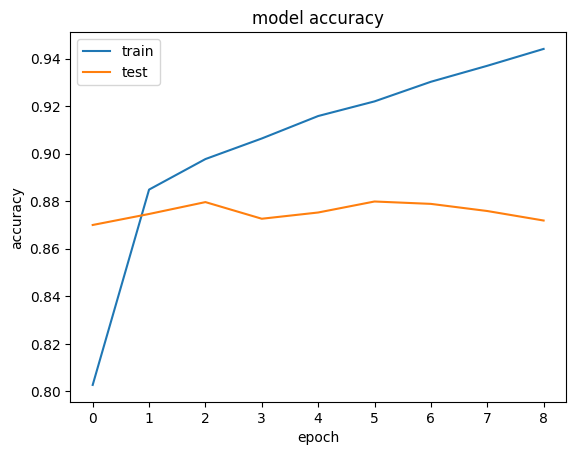

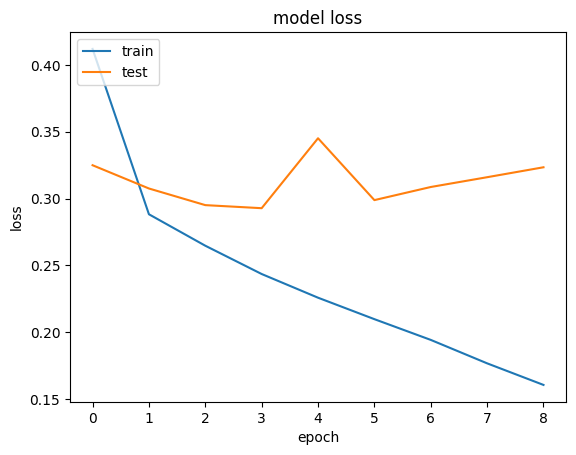

In [36]:
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test), callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

In [37]:
lstm_model.load_weights('.mdl_wts.hdf5')

## GRU Model

In [38]:
gru_model = keras.Sequential()
gru_model.add(keras.layers.Embedding(5000, 32, input_length=125))
gru_model.add(keras.layers.GRU(100, return_sequences = True, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.GRU(100, return_sequences = False, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.Dense(1, activation="sigmoid"))
gru_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

Epoch 1/10
 997/1000 [============================>.] - ETA: 0s - loss: 0.4152 - accuracy: 0.8007
Epoch 1: val_loss did not improve from 0.29280
1000/1000 [==============================] - 38s 35ms/step - loss: 0.4149 - accuracy: 0.8009 - val_loss: 0.3099 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 2/10
 996/1000 [============================>.] - ETA: 0s - loss: 0.2872 - accuracy: 0.8853
Epoch 2: val_loss did not improve from 0.29280
1000/1000 [==============================] - 16s 16ms/step - loss: 0.2871 - accuracy: 0.8854 - val_loss: 0.4106 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9006
Epoch 3: val_loss did not improve from 0.29280
1000/1000 [==============================] - 15s 15ms/step - loss: 0.2530 - accuracy: 0.9006 - val_loss: 0.3247 - val_accuracy: 0.8775 - lr: 0.0010
Epoch 4/10
 997/1000 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9135
Epoch 4: val_loss impro

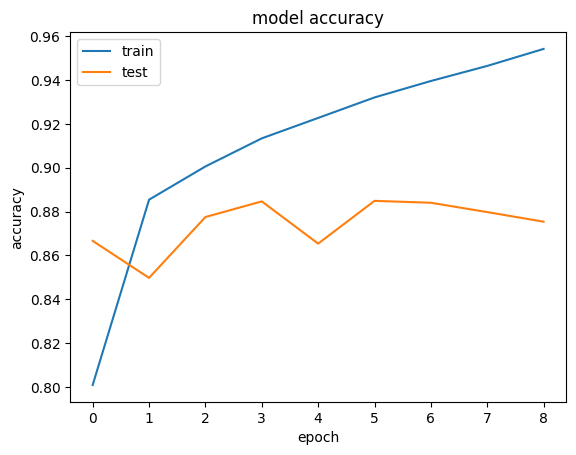

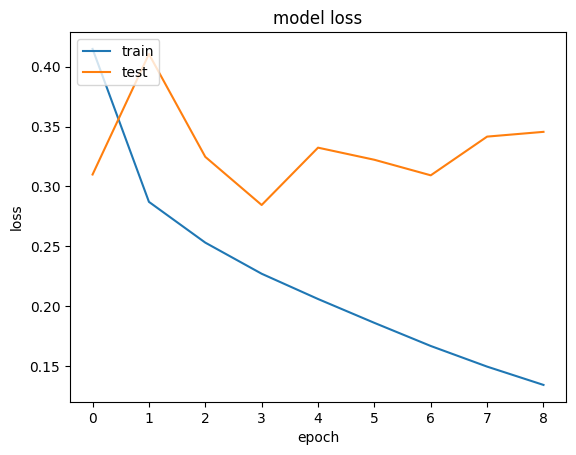

In [39]:
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

In [40]:
gru_model.load_weights('.mdl_wts.hdf5')

In [41]:
def predict(review):
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review)

    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]

    # remove stepwords
    review = [w for w in review if w not in stopwords_]

    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    pred = gru_model.predict(test)[0][0]
    print("Positive : ", pred)
    print("Negative : ", 1-pred)

## Predict

In [42]:
negative_review = "Where to start???? Very cheap story,bad acting,cant understand other people reviews ,especially about Florence acting,she have so stubborn face exprecions,anoying voice overal. Sarcasm all the time through the movie and not funny at all in any moment. To much talking and almost none action. Avoid this at any stake,dont waste money in cinema."

In [43]:
negative_review_2 = "VERY BAD SCRIPT first of all.There are sooooo many characters that I can hardly see Natasha. What the hell is wrong with you people ?! A lot of CGI which sucks.Unrealistic fight scenes in the middle of the town where pedestrians are not reacting........really?Not to mention the fake Russian accent of the actors :))))) Thank God i didn't have to pay to see such a bad movie.You failed."

In [44]:
positive_review = "Johansson and Pugh knock this movie completely out of the park. Their action is gripping, their grief and trauma are convincing & heart-wrenching, and their chemistry is outstanding - the best 'buddy' duo in the MCU, I'd say (outshining Falcon & the Winter Soldier, who I like, et.al.) An added plus is that they are both gorgeous.The story is well-written. Natasha has a chance to settle scores and quiet demons from her past, as well as reunite with those she thought she'd lost. Underneath it all is a sobering fictional example of the all-too-real international problem of human trafficking.If you love Marvel movies, you'll have a blast watching this one (unless, of course, you are a misogynist like some reviewers I have read on this site.)"

In [45]:
positive_review_2 = "This was really fun. Frances Pugh was SUPPOSED to carry the movie as she is in the new Hawkeye series this year. It was fun to see one of the human superheros in action, no special powers. It is like Jason Bourne which is great. I'm glad we didn't spend time watching her be tortured as a child. Very exciting and heartwarming at the same time. No avenger cameos to detract from the film. It's fun and different."

In [46]:
predict(negative_review)

1/1 [==============================] - 1s 866ms/step
Positive :  0.0047614053
Negative :  0.9952385947108269


In [47]:
predict(negative_review_2)

1/1 [==============================] - 0s 33ms/step
Positive :  0.0068737837
Negative :  0.9931262163445354


In [48]:
predict(positive_review)

1/1 [==============================] - 0s 34ms/step
Positive :  0.9589465
Negative :  0.04105347394943237


In [49]:
predict(positive_review_2)

1/1 [==============================] - 0s 34ms/step
Positive :  0.9958851
Negative :  0.004114925861358643


## I have used GRU and LSTM models, both models give best accuracy